In [1]:
# Creamos objeto cliente
class Clientes:
    def __init__(self, nombre, rut, direccion, kpan, kprecio):
        self.nombre = nombre
        self.rut = rut
        self.direccion = direccion
        self.kpan = kilos
        self.kprecio = precio


In [10]:
# Solicitar datos al usuario y almacenarlos en variables
nombre = input("Por favor, ingresa tu nombre: ")  # Solicitar el nombre del usuario
rut = input("Por favor, ingresa tu rut: ")  # Solicitar el rut del usuario
direccion = input("Por favor, ingresa tu dirección: ")  # Solicitar la dirección del usuario
kilos = float(input("Por favor, ingresa cuántos kilos compraste: "))  # Convertir a float para cálculos

# Mostrar los datos ingresados para confirmación
print(f"RUT ingresado: {rut}")
print(f"Nombre ingresado: {nombre}")
print(f"Dirección ingresada: {direccion}")

# Calcular el precio total multiplicando por el precio por kilo
precio_por_kilo = 1000
precio_total = kilos * precio_por_kilo

# Mostrar el valor de la compra
print(f"El valor de tu compra es: {precio_total} pesos")

RUT ingresado: 178899982
Nombre ingresado: pepe
Dirección ingresada: rosas 786
El valor de tu compra es: 5000.0 pesos


In [ ]:
# GENERAMOS UN DATAFRAME DE CLIENTES DE NUESTRA PANADERIA

In [ ]:
import pandas as pd
import random
import numpy as np
from datetime import datetime, timedelta

# Configuración
PRECIO_KILO_PAN = 1000  # Precio por kilo de pan en pesos chilenos
TOTAL_REGISTROS = 1000000  # Número de registros a generar

# Listas de datos para generación aleatoria
nombres = ['Juan', 'María', 'Pedro', 'Ana', 'Luis', 'Carmen', 'Diego', 'Isabel', 'Carlos', 'Laura',
            'José', 'Andrea', 'Miguel', 'Patricia', 'Fernando', 'Daniela', 'Roberto', 'Francisca', 'Sergio', 'Valentina']
apellidos = ['González', 'Muñoz', 'Rojas', 'Díaz', 'Pérez', 'Soto', 'Contreras', 'Silva', 'Martínez', 'Sepúlveda',
             'Morales', 'Rodríguez', 'López', 'Fuentes', 'Hernández', 'Torres', 'Araya', 'Flores', 'Espinoza', 'Castillo']

comunas_chile = ['Santiago', 'Providencia', 'Las Condes', 'Ñuñoa', 'La Reina', 'Macul', 'Peñalolén', 'La Florida',
                 'Puente Alto', 'Maipú', 'San Bernardo', 'La Cisterna', 'El Bosque', 'Recoleta', 'Independencia',
                 'Quilicura', 'Huechuraba', 'Vitacura', 'Lo Barnechea', 'San Miguel']

# Función para generar RUT chileno válido
def generar_rut():
    num = random.randint(1, 25000000)
    digito = generar_digito_verificador(num)
    return f"{num}-{digito}"

def generar_digito_verificador(numero):
    reversed_digits = map(int, reversed(str(numero)))
    factors = cycle(range(2, 8))
    s = sum(d * f for d, f in zip(reversed_digits, factors))
    mod = (-s) % 11
    return 'K' if mod == 10 else str(mod)

def cycle(iterable):
    while True:
        for x in iterable:
            yield x

# Función para generar dirección aleatoria
def generar_direccion():
    calle = random.choice(['Calle', 'Avenida', 'Pasaje'])
    nombre_calle = random.choice(['Los Aromos', 'Las Acacias', 'Los Plátanos', 'Los Olivos', 'Los Laureles',
                                 'Alameda', 'Principal', '5 de Abril', '21 de Mayo', 'Arturo Prat'])
    numero = random.randint(1, 9999)
    comuna = random.choice(comunas_chile)
    return f"{calle} {nombre_calle} {numero}, {comuna}"

# Generar los datos
data = {
    'nombre': [],
    'rut': [],
    'direccion': [],
    'kilos_comprados': [],
    'valor_total': [],
    'fecha_compra': [],
    'valor_venta_diaria': []  # Nueva columna
}

for _ in range(TOTAL_REGISTROS):
    # Nombre completo
    nombre = f"{random.choice(nombres)} {random.choice(apellidos)} {random.choice(apellidos)}"
    data['nombre'].append(nombre)
    
    # RUT
    data['rut'].append(generar_rut())
    
    # Dirección
    data['direccion'].append(generar_direccion())
    
    # Kilos comprados (distribución normal con media en 2kg)
    kilos = min(20, max(0.1, random.gauss(2, 1.5)))
    data['kilos_comprados'].append(round(kilos, 1))
    
    # Valor total
    valor_total = int(kilos * PRECIO_KILO_PAN)
    data['valor_total'].append(valor_total)
    
    # Fecha (últimos 3 años)
    dias_atras = random.randint(1, 365*3)
    fecha = datetime.now() - timedelta(days=dias_atras)
    data['fecha_compra'].append(fecha.strftime('%Y-%m-%d %H:%M:%S'))
    
    # Valor venta diaria (simulación de ventas diarias)
    valor_venta_diaria = valor_total * random.uniform(0.8, 1.2)  # Variación del 80% al 120%
    data['valor_venta_diaria'].append(round(valor_venta_diaria, 2))

# Crear DataFrame
df = pd.DataFrame(data)

# Mostrar información del DataFrame
print("Información del DataFrame:")
print(df.info())

# Mostrar primeras filas
print("\nPrimeras 5 filas:")
display(df.head())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
display(df.describe())

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   nombre              1000000 non-null  object 
 1   rut                 1000000 non-null  object 
 2   direccion           1000000 non-null  object 
 3   kilos_comprados     1000000 non-null  float64
 4   valor_total         1000000 non-null  int64  
 5   fecha_compra        1000000 non-null  object 
 6   valor_venta_diaria  1000000 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 53.4+ MB
None

Primeras 5 filas:


,nombre,rut,direccion,kilos_comprados,valor_total,fecha_compra,valor_venta_diaria
0,María Flores Sepúlveda,8515885-6,"Avenida 5 de Abril 9258, Maipú",3.3,3305,2025-03-08 14:25:12,3782.42
1,María Torres González,15578373-7,"Calle 21 de Mayo 8763, Las Condes",0.8,778,2023-04-08 14:25:12,819.61
2,José Silva Soto,19243698-2,"Calle Principal 6100, Vitacura",5.1,5101,2022-04-06 14:25:12,5280.81
3,Juan Fuentes Muñoz,18218838-7,"Avenida Los Olivos 645, Ñuñoa",0.1,100,2023-11-09 14:25:12,109.60
4,Juan Contreras González,2065398-1,"Calle Arturo Prat 9224, Macul",0.2,184,2022-04-02 14:25:12,210.20



Estadísticas descriptivas:


,kilos_comprados,valor_total,valor_venta_diaria
count,1000000.000000,1000000.000000,1000000.000000
mean,2.073106,2072.677660,2072.446651
std,1.369731,1369.299425,1399.144548
min,0.100000,100.000000,80.000000
25%,1.000000,987.000000,971.460000
50%,2.000000,1999.000000,1972.600000
75%,3.000000,3010.000000,2997.242500
max,9.000000,9009.000000,9323.100000


In [ ]:
# CREAMOS FUNCION PARA VISUALIZAR VENTAS POR FECHA
def visualizar_ventas_por_fecha(df):
    # Solicitar al usuario una fecha
    fecha_usuario = input("Ingrese una fecha en formato 'YYYY-MM-DD' (por ejemplo, 2025-03-31): ")
    
    # Filtrar las ventas para la fecha ingresada
    ventas_fecha = df[df['fecha_compra'].str.startswith(fecha_usuario)]
    
    # Verificar si hay v
    # entas para la fecha ingresada
    if ventas_fecha.empty:
        print(f"No se encontraron ventas para la fecha {fecha_usuario}.")
    else:
        # Calcular el valor total de ventas para la fecha
        valor_total_ventas = ventas_fecha['valor_total'].sum()
        
        # Mostrar las ventas y el valor total
        print(f"\nVentas para la fecha {fecha_usuario}:")
        display(ventas_fecha)
        print(f"\nValor total de ventas para la fecha {fecha_usuario}: {valor_total_ventas} pesos")

# Llamar a la función para visualizar las ventas por fecha
visualizar_ventas_por_fecha(df)


Ventas para la fecha 2025-03-30:


,nombre,rut,direccion,kilos_comprados,valor_total,fecha_compra,valor_venta_diaria
1829,Roberto Flores Rodríguez,16954459-K,"Pasaje Principal 8535, El Bosque",4.0,3993,2025-03-30 14:25:12,3586.16
2857,Pedro Rojas Hernández,7419998-4,"Pasaje Los Plátanos 5386, Las Condes",1.6,1552,2025-03-30 14:25:12,1457.25
4584,Carlos Hernández Muñoz,5563035-6,"Avenida Los Olivos 637, Lo Barnechea",3.7,3732,2025-03-30 14:25:12,3531.00
5040,Francisca Sepúlveda Rodríguez,14551277-8,"Calle 5 de Abril 9594, La Cisterna",1.3,1320,2025-03-30 14:25:12,1521.04
5214,Carmen Sepúlveda Martínez,1366706-3,"Calle Los Plátanos 5645, Peñalolén",0.1,115,2025-03-30 14:25:12,94.81
...,...,...,...,...,...,...,...
998411,Sergio Sepúlveda Sepúlveda,5465772-2,"Avenida Los Olivos 7274, Providencia",1.8,1810,2025-03-30 14:26:55,1893.70
998622,Fernando Fuentes Contreras,21903571-3,"Pasaje 5 de Abril 5679, El Bosque",3.3,3303,2025-03-30 14:26:55,2748.30
998802,Andrea González Araya,24587432-4,"Calle Los Plátanos 2301, La Florida",1.1,1098,2025-03-30 14:26:55,1025.89
998878,Luis Soto Morales,13184109-4,"Pasaje Las Acacias 3433, San Miguel",0.1,100,2025-03-30 14:26:55,118.35



Valor total de ventas para la fecha 2025-03-30: 2048186 pesos


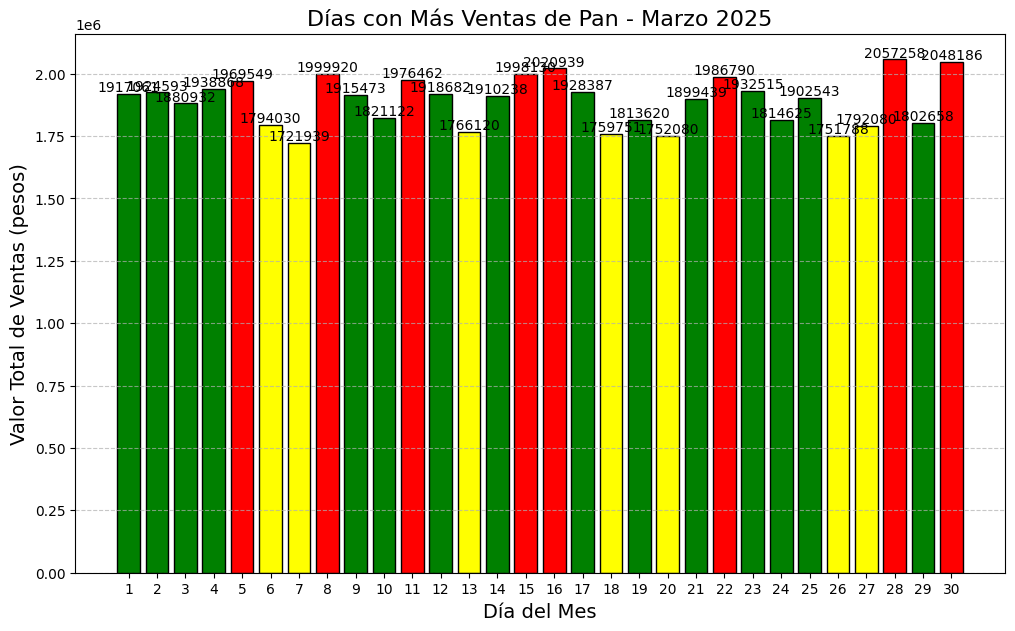

In [ ]:


# CREAMOS UN FILTRO PARA VER LAS VENTAS DEL MES DE MARZO 2025 Y DIFERENCIAR POR COLROES
import pandas as pd
df['fecha_compra'] = pd.to_datetime(df['fecha_compra'])  # Asegurarse de que la columna sea de tipo datetime
marzo_2025 = df[(df['fecha_compra'].dt.year == 2025) & (df['fecha_compra'].dt.month == 3)]

# Agrupar por día y calcular el valor total de ventas
ventas_por_dia = marzo_2025.groupby(marzo_2025['fecha_compra'].dt.day)['valor_total'].sum()

# Crear un gráfico de barras para visualizar los días con más ventas
dias = ventas_por_dia.index
valores_ventas = ventas_por_dia.values

# Asignar colores según el valor total de ventas
colores = []
for v in valores_ventas:
    if v < 1800000:  # Ventas bajas
        colores.append('yellow')
    elif 1800000 < v < 1950000:  # Ventas medias
        colores.append('green')
    else:  # Ventas altas
        colores.append('red')

# Crear el gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
bars = plt.bar(dias, valores_ventas, color=colores, edgecolor='black')

# Personalizar el gráfico
plt.title('Días con Más Ventas de Pan - Marzo 2025', fontsize=16)
plt.xlabel('Día del Mes', fontsize=14)
plt.ylabel('Valor Total de Ventas (pesos)', fontsize=14)
plt.xticks(dias)  # Mostrar todos los días en el eje X
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir etiquetas a las barras
for bar, valor in zip(bars, valores_ventas):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10000, f'{int(valor)}', ha='center', fontsize=10)

# Mostrar el gráfico
plt.show()